# Project 1: Automated market report

Retrieve historical stock and index prices and send a report on email

# Step-by-step guide:

1- Install and import modules </br>
2- Retrieve historical data</br>
3- Clean retrieved data</br>
4- Plot performance graphs</br>
5- Calculate daily metrics</br>
6- Configure and send email</br>

# Installing and importing modules and libraries

In [2]:
%pip install mplcyberpunk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 KB 1.0 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 4.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138894 sha256=805328cbdc60a0cbccf6e2c7db82b2dc562b85ae38ffef54326a0057ecdcec79
  Stored in directory: /home/gabryel/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee
Note: you may need to restart the kernel to use updated packages

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk

# Retrieving historical data

In [7]:
tickers = ["^BVSP", "^GSPC", "BRL=X"]

market_data = yf.download(tickers, period = "6mo")

market_data.head()

[*********************100%***********************]  3 of 3 completed


Price                     Adj Close                           Close            \
Ticker                        BRL=X     ^BVSP        ^GSPC    BRL=X     ^BVSP   
Date                                                                            
2024-03-11 00:00:00+00:00   4.97754  126124.0  5117.939941  4.97754  126124.0   
2024-03-12 00:00:00+00:00   4.97740  127668.0  5175.270020  4.97740  127668.0   
2024-03-13 00:00:00+00:00   4.96870  128006.0  5165.310059  4.96870  128006.0   
2024-03-14 00:00:00+00:00   4.96920  127690.0  5150.479980  4.96920  127690.0   
2024-03-15 00:00:00+00:00   4.99270  126742.0  5117.089844  4.99270  126742.0   

Price                                     High                         \
Ticker                           ^GSPC   BRL=X     ^BVSP        ^GSPC   
Date                                                                    
2024-03-11 00:00:00+00:00  5117.939941  4.9975  127068.0  5124.660156   
2024-03-12 00:00:00+00:00  5175.270020  4.9919  128039.0  5179.870117   
2024-03-13 00:00:00+00:00  5165.310059  4.9858  128530.0  5179.140137   
2024-03-14 00:00:00+00:00  5150.479980  4.9806  128256.0  5176.850098   
2024-03-15 00:00:00+00:00  5117.089844  4.9996  127957.0  5136.859863   

Price                           Low                            Open            \
Ticker                        BRL=X     ^BVSP        ^GSPC    BRL=X     ^BVSP   
Date                                                                            
2024-03-11 00:00:00+00:00  4.959800  126065.0  5091.140137  4.97754  127068.0   
2024-03-12 00:00:00+00:00  4.958000  126121.0  5114.479980  4.97740  126124.0   
2024-03-13 00:00:00+00:00  4.948557  127439.0  5151.879883  4.96870  127668.0   
2024-03-14 00:00:00+00:00  4.952065  127192.0  5123.299805  4.96920  127992.0   
2024-03-15 00:00:00+00:00  4.978213  126502.0  5104.350098  4.99270  127682.0   

Price                                  Volume                            
Ticker                           ^GSPC  BRL=X       ^BVSP         ^GSPC  
Date                                                                     
2024-03-11 00:00:00+00:00  5111.959961      0   8899100.0  3.896430e+09  
2024-03-12 00:00:00+00:00  5134.299805      0   9483700.0  4.080510e+09  
2024-03-13 00:00:00+00:00  5173.490234      0   8837200.0  4.282890e+09  
2024-03-14 00:00:00+00:00  5175.140137      0   9292600.0  4.687970e+09  
2024-03-15 00:00:00+00:00  5123.310059      0  14992400.0  7.753670e+09

In [8]:
adj_closed = market_data["Adj Close"]
adj_closed

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.0000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.0000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.0000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.0000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.0000,5117.089844
...,...,...,...
2024-09-04 00:00:00+00:00,5.64750,136111.0000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.0000,5503.410156
2024-09-06 00:00:00+00:00,5.56750,134572.0000,5408.419922


# Data Cleaning

In [14]:
#Deleting NaN values
adj_closed = adj_closed.dropna()

#Renaming columns
hum_tickers = ["DOLLAR", "IBOVESPA", "S&P500"]
adj_closed.columns = hum_tickers

adj_closed

,DOLLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.0000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.0000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.0000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.0000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.0000,5117.089844
...,...,...,...
2024-09-04 00:00:00+00:00,5.64750,136111.0000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.0000,5503.410156
2024-09-06 00:00:00+00:00,5.56750,134572.0000,5408.419922


# Plotting graphs

In [11]:
plt.style.use("cyberpunk")

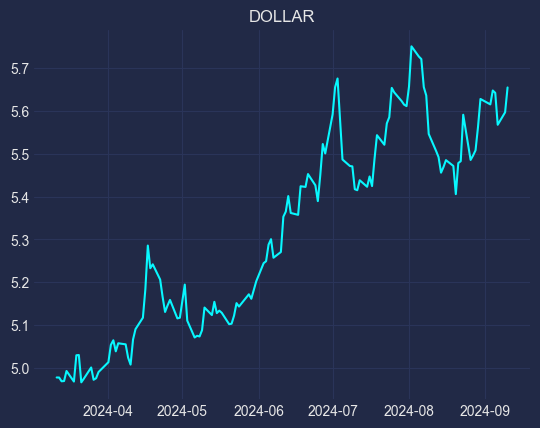

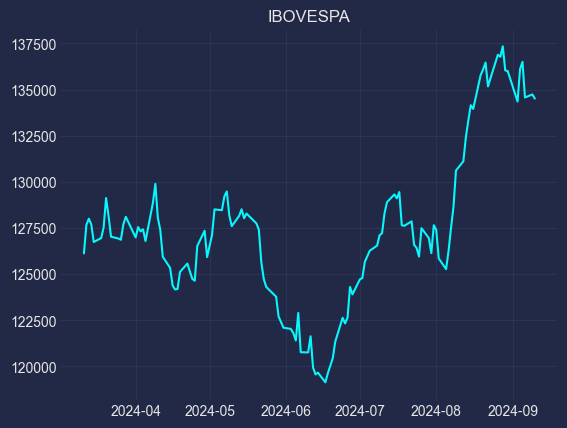

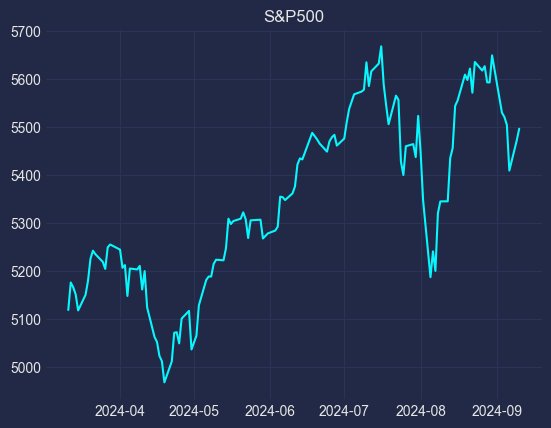

In [20]:
# plotting the graphs using matplotlib
for ticker in hum_tickers:
    plt.plot(adj_closed[ticker])
    plt.title(ticker)
    plt.savefig(f"{ticker}.png")
    plt.show()

# Calculating daily metrics

In [22]:
daily_rentability = adj_closed.pct_change()#you can change the period here

daily_rentability = daily_rentability.dropna()
daily_rentability

,DOLLAR,IBOVESPA,S&P500
Date,,,
2024-03-12 00:00:00+00:00,-0.000028,0.012242,0.011202
2024-03-13 00:00:00+00:00,-0.001748,0.002647,-0.001925
2024-03-14 00:00:00+00:00,0.000101,-0.002469,-0.002871
2024-03-15 00:00:00+00:00,0.004729,-0.007424,-0.006483
2024-03-18 00:00:00+00:00,-0.004938,0.001673,0.006318
...,...,...,...
2024-09-04 00:00:00+00:00,0.005770,0.013085,-0.001603
2024-09-05 00:00:00+00:00,-0.000974,0.002873,-0.003018
2024-09-06 00:00:00+00:00,-0.013205,-0.014139,-0.017260


In [27]:
dollar_closed = daily_rentability["DOLLAR"].iloc[-1]
ibovespa_closed = daily_rentability["IBOVESPA"].iloc[-1]
sp_closed = daily_rentability["S&P500"].iloc[-1]

In [29]:
dollar_closed = str(round(dollar_closed * 100, 2)) + "%"
ibovespa_closed = str(round(ibovespa_closed * 100, 2)) + "%"
sp_closed = str(round(sp_closed * 100, 2)) + "%"

print(dollar_closed, ibovespa_closed, sp_closed)

1.04% -0.17% 0.45%


# Sending the email

In [31]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
from email.mime.base import MIMEBase
from email import encoders
import os


In [37]:
#defining parameters
sender_email = "sender@email.com"
receiver_email = "receiver@email.com"
password = "password"

subject = "Market Report and Asset Performance"

body = f"""Dear Director,

Please find below the market report:

The Ibovespa closed with a return of {ibovespa_closed}.
The Dollar had a return of {dollar_closed}.
The S&P 500 closed with a return of {sp_closed}.
Attached, you will find the performance of the assets over the last six months.

Best regards,

"""

#creating mail object and updating it
mail = MIMEMultipart()
mail["From"] = sender_email
mail["To"] = receiver_email
mail["Subject"] = subject

mail.attach(MIMEText(body, "plain"))

#attaching the images into the email
paths = ["List with the images' paths"]

for path in paths:
    with open(path, 'rb') as image_file:
        img = MIMEImage(image_file.read(), name=os.path.basename(path))
        mail.attach(img)

#connecting to gmail's SMTP server and sending the email
try:
    server = smtplib.SMTP_SSL("smtp.gmail.com", 465)
    server.login(sender_email, password)

    server.sendmail(sender_email, receiver_email, mail.as_string())
    print("Email has been sent successfully!")

except Exception as e:

    print(f"Error occurred: {e}")

finally:
    server.quit()

Email has been sent successfuly!
